# **K-Means Clustering**

### **Importing All Necessary Libraries**

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.decomposition import PCA

### **Data Framing**

In [2]:
seed_data = pd.read_csv('Seed_Data.csv')
seed_data.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


The dataset consists of several features and a target column. Here's an explanation of each column in the dataset:

A: This column likely represents the area of the seed.

P: This column represents the perimeter of the seed.

C: This column represents the compactness of the seed.

LK: This column represents the length of the kernel.

WK: This column represents the width of the kernel.

A_Coef: This column represents the asymmetry coefficient of the seed.

LKG: This column represents the length of the kernel groove.

target: This column represents the target class for the seed. It could be a categorical variable representing different types or categories of seeds.

These features are commonly used in seed classification datasets to distinguish between different types of seeds based on their physical and geometrical properties.

In [3]:
print(f"data shape: {seed_data.shape}\n") # Checking data shape
print(seed_data.isnull().sum(), "\n") # Checking null values
print(seed_data.describe())

data shape: (210, 8)

A         0
P         0
C         0
LK        0
WK        0
A_Coef    0
LKG       0
target    0
dtype: int64 

                A           P           C          LK          WK      A_Coef  \
count  210.000000  210.000000  210.000000  210.000000  210.000000  210.000000   
mean    14.847524   14.559286    0.870999    5.628533    3.258605    3.700201   
std      2.909699    1.305959    0.023629    0.443063    0.377714    1.503557   
min     10.590000   12.410000    0.808100    4.899000    2.630000    0.765100   
25%     12.270000   13.450000    0.856900    5.262250    2.944000    2.561500   
50%     14.355000   14.320000    0.873450    5.523500    3.237000    3.599000   
75%     17.305000   15.715000    0.887775    5.979750    3.561750    4.768750   
max     21.180000   17.250000    0.918300    6.675000    4.033000    8.456000   

              LKG      target  
count  210.000000  210.000000  
mean     5.408071    1.000000  
std      0.491480    0.818448  
min      

### **Separate features and target**

In [4]:
X = seed_data.drop('target', axis=1)

### **Standardize the features**

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

StandardScaler is used to standardize the features. This step ensures that each feature has a mean of 0 and a standard deviation of 1, which is important for clustering algorithms.

### **Apply PCA to reduce dimensionality**

In [6]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

PCA is applied to reduce the dimensionality of the data to 2 principal components. This helps in visualizing the data and may improve clustering performance by removing noise.

### **Find the optimal number of clusters using the silhouette score**

In [7]:
range_n_clusters = list(range(2, 11))
silhouette_avg_list = []

for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_pca)
    clusters = kmeans.predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, clusters)
    silhouette_avg_list.append(silhouette_avg)
    print(f'For n_clusters = {num_clusters}, the silhouette score is {silhouette_avg}')

For n_clusters = 2, the silhouette score is 0.5299342668285049
For n_clusters = 3, the silhouette score is 0.49284349162400837
For n_clusters = 4, the silhouette score is 0.4431426271824458
For n_clusters = 5, the silhouette score is 0.40423971549060816
For n_clusters = 6, the silhouette score is 0.3851171882573743
For n_clusters = 7, the silhouette score is 0.4034252615078563
For n_clusters = 8, the silhouette score is 0.36547766670591364
For n_clusters = 9, the silhouette score is 0.3849425424358972
For n_clusters = 10, the silhouette score is 0.3689442969480513


A loop is used to determine the optimal number of clusters by computing the silhouette score for a range of cluster numbers (2 to 10).

For each number of clusters, K-means is applied, clusters are predicted, and the silhouette score is calculated and stored.

### **Plotting the silhouette scores**

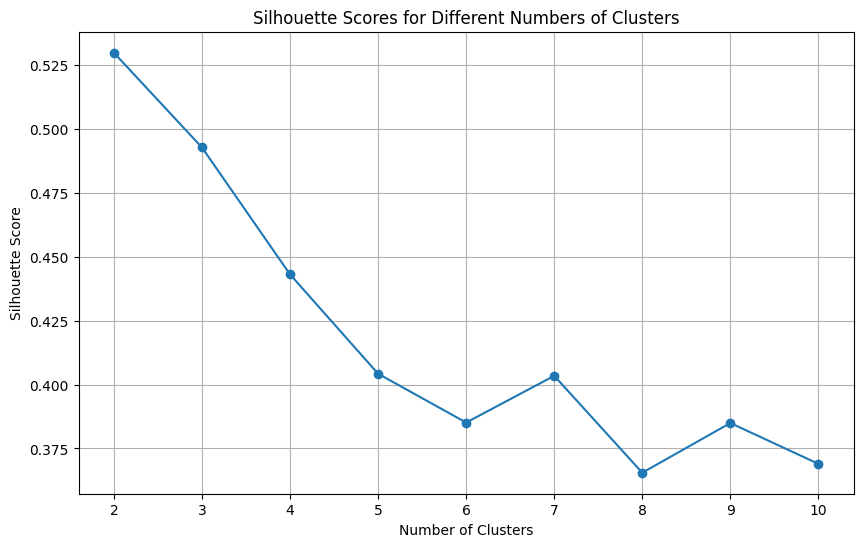

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, silhouette_avg_list, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid()
plt.show()

The silhouette scores for different numbers of clusters are plotted. 

This helps in identifying the optimal number of clusters based on the highest silhouette score.

### **Apply K-means clustering with the optimal number of clusters**

In [9]:
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_avg_list)]
kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(X_pca)
clusters = kmeans.predict(X_pca)

The optimal number of clusters is determined as the one with the highest silhouette score.

K-means clustering is applied using this optimal number of clusters, and clusters are predicted.

### **Add Cluster Predictions to Data**

In [10]:
# Add the cluster predictions to the original data
seed_data['Cluster'] = clusters
seed_data.head()

,A,P,C,LK,WK,A_Coef,LKG,target,Cluster
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0,0


### **Predict the clusters**

In [11]:
# Calculate the final silhouette score
final_silhouette_avg = silhouette_score(X_pca, clusters)
print(f'Final Silhouette Score with {optimal_n_clusters} clusters: {final_silhouette_avg}')

Final Silhouette Score with 2 clusters: 0.5299342668285049


The final silhouette score of 0.5299 with 2 clusters indicates that the clustering is moderately good, with reasonably well-separated and well-defined clusters. This suggests that two clusters capture the data structure effectively.

### **Plotting the clusters**

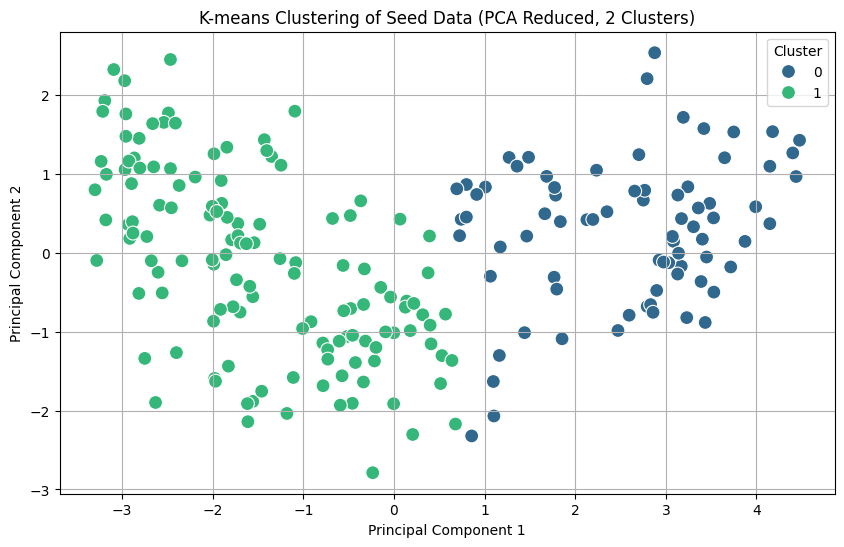

In [12]:
# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters, palette='viridis', s=100)
plt.title(f'K-means Clustering of Seed Data (PCA Reduced, {optimal_n_clusters} Clusters)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid()
plt.show()

The clusters are plotted in the PCA-reduced 2D space using seaborn's scatter plot. Different colors represent different clusters.